**About Yulu**

Yulu, a pioneering micro-mobility service provider in India, offers innovative vehicles tailored for daily commuting needs. Originating from a mission to alleviate traffic congestion in India, Yulu delivers the safest commuting solutions through a user-friendly mobile app, facilitating shared, solo, and eco-friendly commuting experiences.

Strategically positioned at key locations such as metro stations, bus stands, office spaces, residential areas, and corporate offices, Yulu zones ensure seamless, affordable, and convenient first and last-mile connectivity.

Facing recent declines in revenue, Yulu has engaged a consulting firm to analyze the factors influencing the demand for their shared electric cycles in the Indian market.

In [43]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
csv_path = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(csv_path, delimiter=",")

In [45]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [46]:
print(f"# rows: {df.shape[0]} \n# columns: {df.shape[1]}")

# rows: 10886 
# columns: 12


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In order to ensure proper data representation and analysis, the following attributes in the dataset need to be converted to their appropriate data types:

- `datetime` should be converted to datetime format.
- `season`, `holiday`, `workingday`, and `weather` should be converted to categorical format.
weather - to categorical

In [48]:
df['datetime'] = pd.to_datetime(df['datetime'])

cat_cols= ['season', 'holiday', 'workingday', 'weather']
for col in cat_cols:
    df[col] = df[col].astype('object')

In [49]:
df.iloc[:, 1:].describe(include='all')

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,NaN,NaN,NaN,NaN,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000


```markdown
* The dataset does not contain any missing values.
* The attributes "casual" and "registered" may have outliers, as indicated by the significant difference between their mean and median values, as well as the high standard deviation, suggesting a high variance in the data for these attributes.
```

In [50]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no missing values present in the dataset.

In [51]:
df['datetime'].min(), df['datetime'].max()

(Timestamp('2011-01-01 00:00:00'), Timestamp('2012-12-19 23:00:00'))

In [52]:
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

**Univariate Analysis**

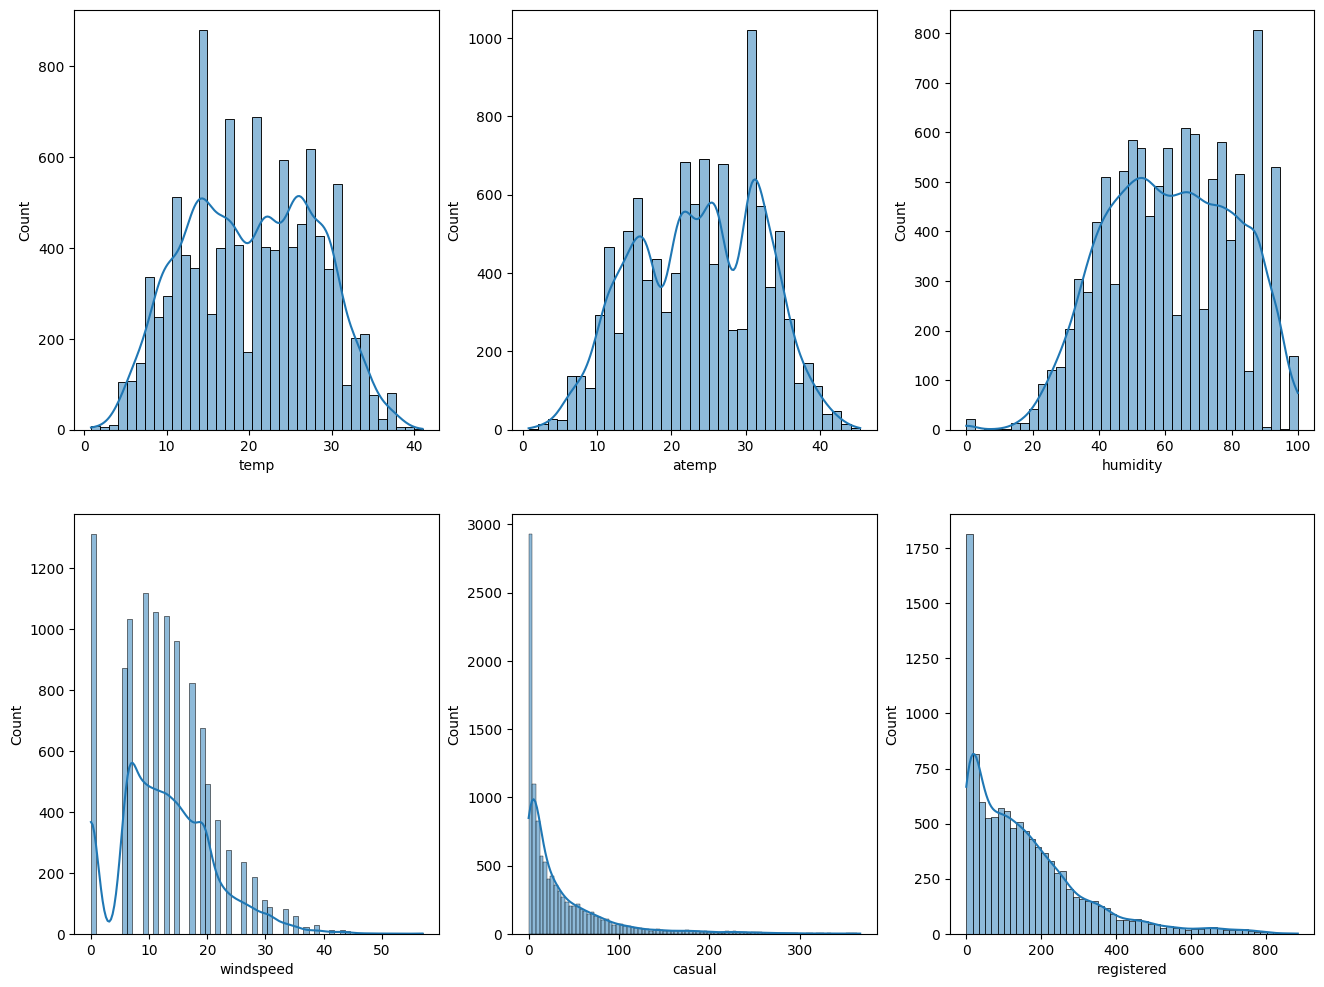

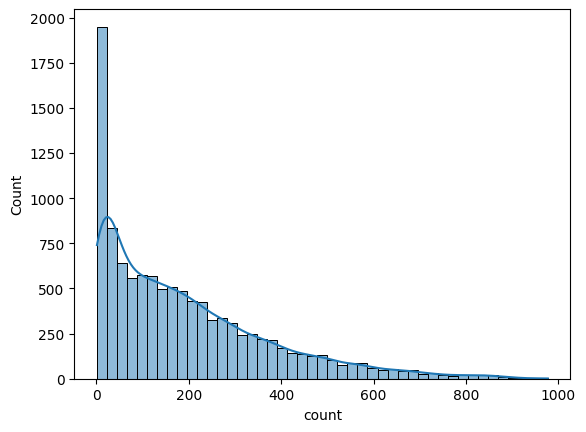

In [53]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1

plt.show()
sns.histplot(df[num_cols[-1]], kde=True)
plt.show()


1. Casual, Registered, and Count:
    - The distribution of these attributes somewhat resembles a Log Normal Distribution. This means that the majority of the values are concentrated towards the lower end of the distribution, with a few extreme values towards the higher end.

2. Temperature (Temp) and "Feels Like" Temperature (Atemp):
    - The distribution of these attributes appears to follow a Normal Distribution. This implies that the values are symmetrically distributed around the mean, with the majority of values concentrated near the mean.

3. Humidity:
    - The distribution of humidity also seems to follow a Normal Distribution. Similar to temperature, the values are symmetrically distributed around the mean, with the majority of values concentrated near the mean.

4. Windspeed:
    - The distribution of windspeed appears to follow a Binomial Distribution. This means that the values are discrete and can take only two possible outcomes (e.g., high windspeed or low windspeed). The distribution shows a higher frequency for certain windspeed values.


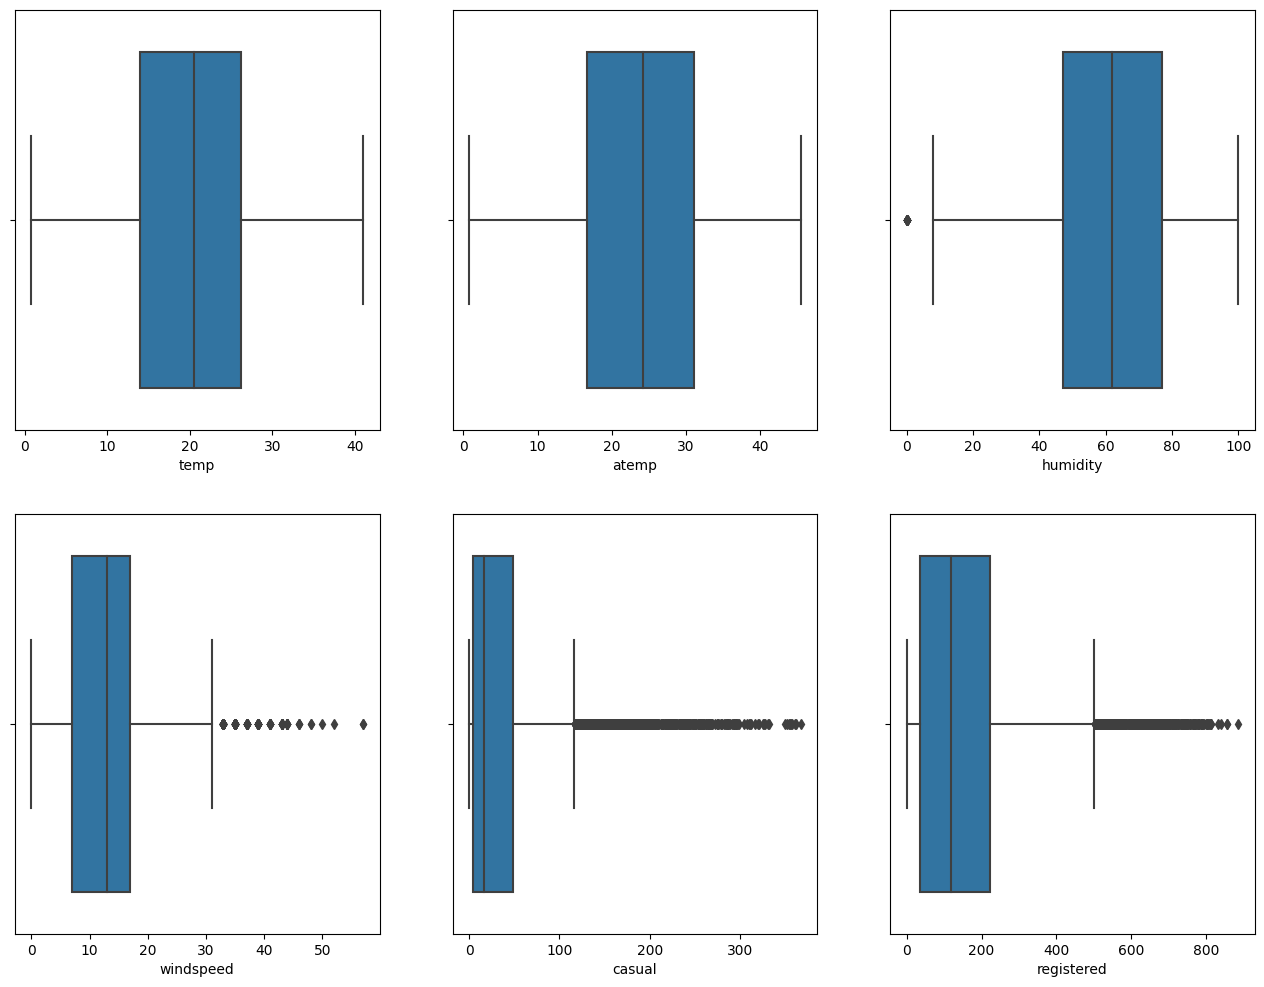

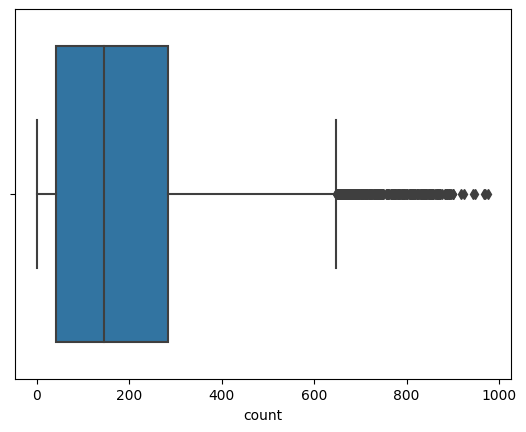

In [54]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.boxplot(x=df[num_cols[index]], ax=axis[row, col])
        index += 1

plt.show()
sns.boxplot(x=df[num_cols[-1]])
plt.show()

* humidity, casual, registered and count have outliers in the data.

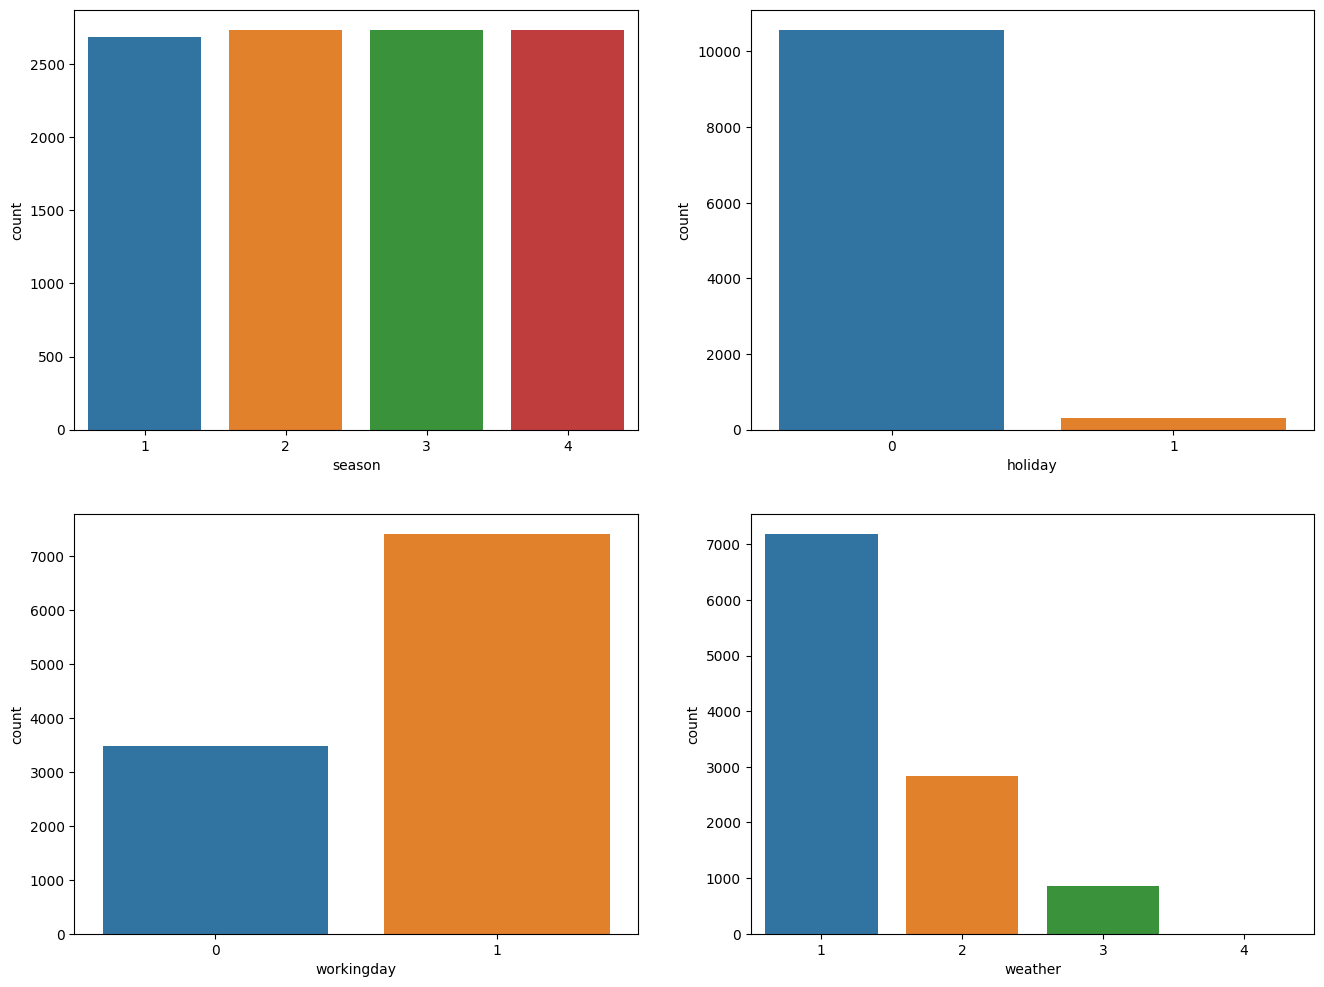

In [55]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1

plt.show()

```markdown
The data appears to be consistent, with an equal number of days in each season, a higher number of working days, and mostly clear weather conditions with a few clouds and partly cloudy skies.
```

**Bi-variate Analysis**

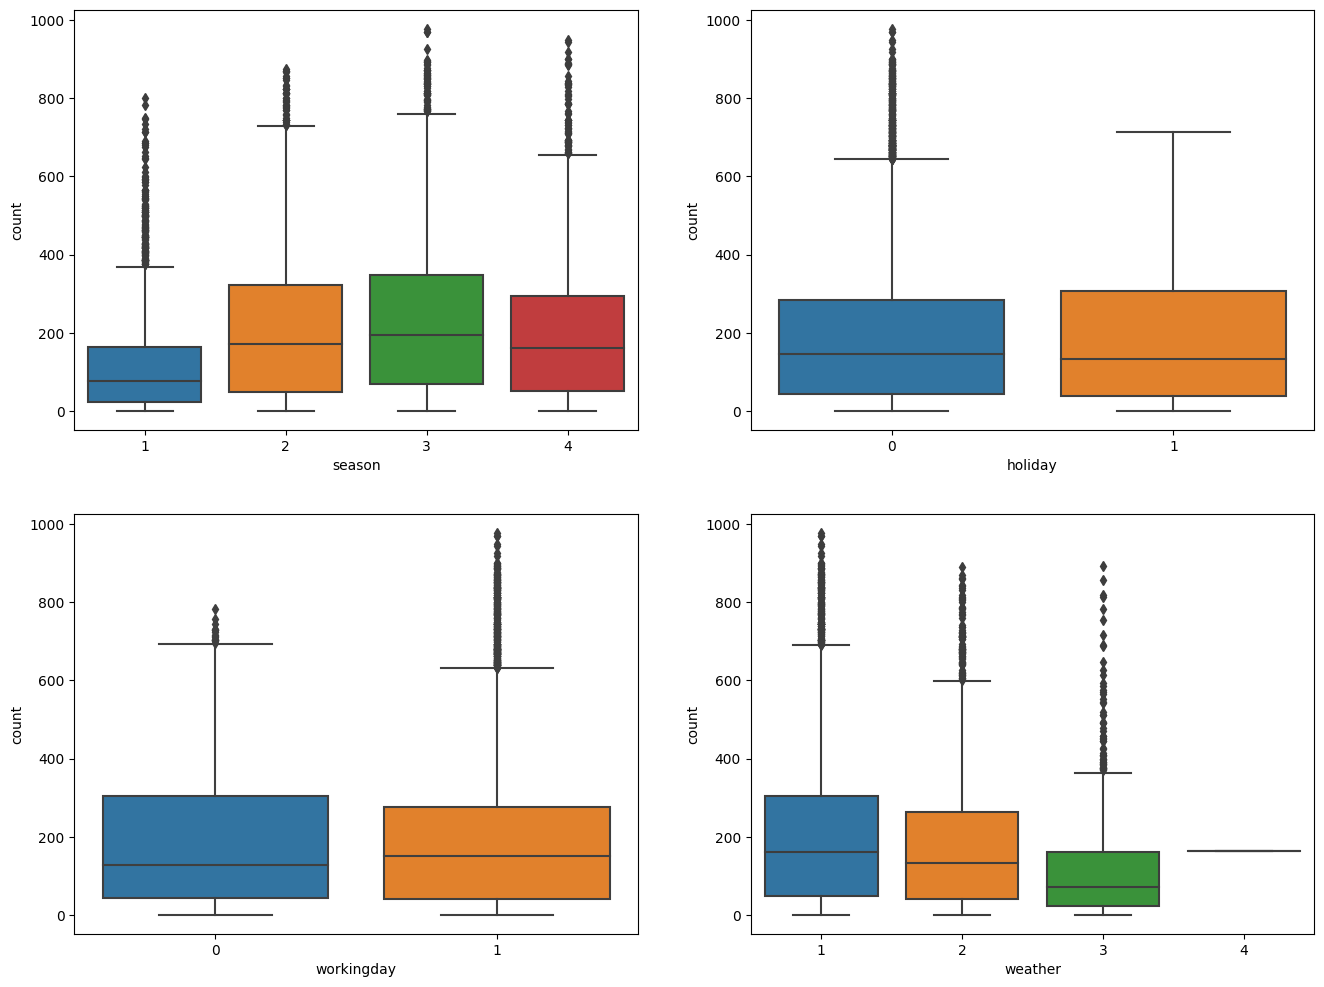

In [56]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()

```markdown
Based on the analysis, it was observed that during the summer and fall seasons, there is a higher demand for bike rentals compared to other seasons. Additionally, there is an increase in bike rentals during holidays and weekends. Moreover, adverse weather conditions such as rain, thunderstorms, snow, or fog resulted in a decrease in the number of bike rentals.
```


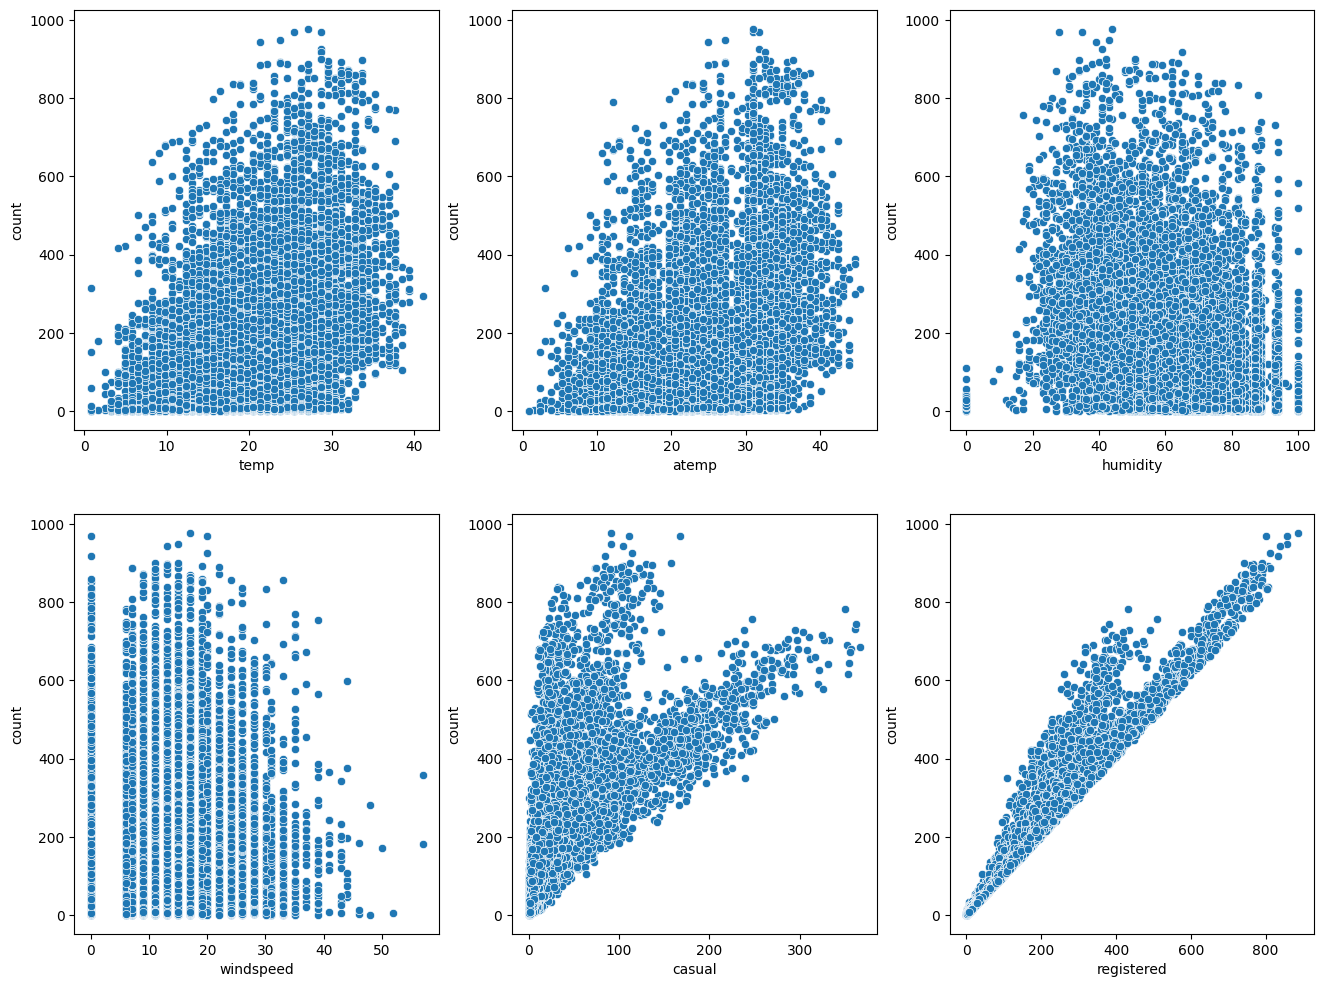

In [57]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.scatterplot(data=df, x=num_cols[index], y='count', ax=axis[row, col])
        index += 1

plt.show()


- Whenever the humidity is less than 20, the number of bikes rented is very low.
- Whenever the temperature is less than 10, the number of bikes rented is less.
- Whenever the windspeed is greater than 35, the number of bikes rented is less.

In [58]:
df.corr()['count']

<ipython-input-58-c6e37b628cdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['count']


temp          0.394454
atemp         0.389784
humidity     -0.317371
windspeed     0.101369
casual        0.690414
registered    0.970948
count         1.000000
Name: count, dtype: float64

<ipython-input-59-6522c2b4e5f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


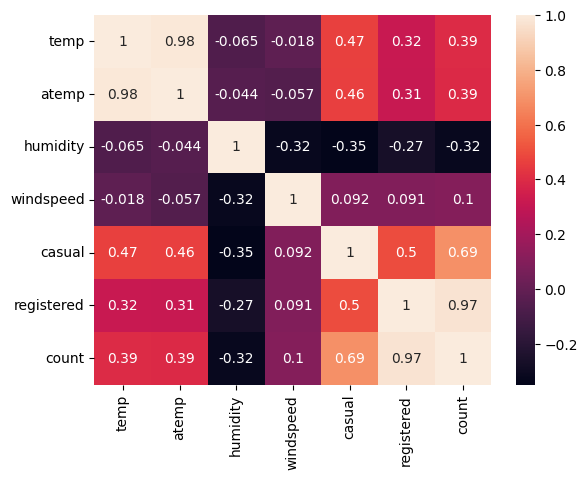

In [59]:
sns.heatmap(df.corr(), annot=True)
plt.show()

**Hypothesis Testing - 1**

**Null Hypothesis (H0):** Weather is independent of the season

**Alternate Hypothesis (H1):** Weather is not independent of the season

**Significance level (alpha):** 0.05

We will use chi-square test to test hypyothesis defined above.

In [60]:
data_table = pd.crosstab(df['season'], df['weather'])
print("Observed values:")
data_table

Observed values:


weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


In [61]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01]])

In [62]:
nrows, ncols = 4, 4
dof = (nrows-1)*(ncols-1)
print("degrees of freedom: ", dof)
alpha = 0.05


chi_sqr = sum([(o-e)**2/e for o, e in zip(data_table.values, expected_values)])
chi_sqr_statistic = chi_sqr[0] + chi_sqr[1]
print("chi-square test statistic: ", chi_sqr_statistic)

critical_val = stats.chi2.ppf(q=1-alpha, df=dof)
print(f"critical value: {critical_val}")

p_val = 1-stats.chi2.cdf(x=chi_sqr_statistic, df=dof)
print(f"p-value: {p_val}")

if p_val <= alpha:
    print("\nSince p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that\
    Weather is dependent on the season.")
else:
    print("Since p-value is greater than the alpha 0.05, We do not reject the Null Hypothesis")

degrees of freedom:  9
chi-square test statistic:  44.09441248632364
critical value: 16.918977604620448
p-value: 1.3560001579371317e-06

Since p-value is less than the alpha 0.05, We reject the Null Hypothesis. Meaning that    Weather is dependent on the season.


**Hypothesis Testing - 2**

**Null Hypothesis:** Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis:** Working day has effect on the number of cycles being rented.

**Significance level (alpha):** 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

In [63]:
data_group1 = df[df['workingday']==0]['count'].values
data_group2 = df[df['workingday']==1]['count'].values

np.var(data_group1), np.var(data_group2)

(30171.346098942427, 34040.69710674686)

```markdown

Before conducting the two-sample T-Test, it is important to determine if the given data groups have equal variances. One way to assess this is by comparing the ratio of the larger data group's variance to the smaller data group's variance. If the ratio is less than 4:1, it can be considered that the data groups have equal variances.

In this case, the ratio of the larger data group's variance (34040.70) to the smaller data group's variance (30171.35) is less than 4:1, indicating that the data groups have equal variances.
```

In [64]:
stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=-1.2096277376026694, pvalue=0.22644804226361348)

Since pvalue is greater than 0.05 so we can not reject the Null hypothesis. We don't have the sufficient evidence to say that working day has effect on the number of cycles being rented.


To perform Hypothesis Testing - 3, we can use the ANOVA (Analysis of Variance) test. The objective is to determine if the number of cycles rented is similar or different across different weather and season conditions.

**Null Hypothesis (H0):** The number of cycles rented is similar in different weather and season conditions.

**Alternate Hypothesis (H1):** The number of cycles rented is not similar in different weather and season conditions.

**Significance level (alpha):** 0.05

We will conduct the ANOVA test to analyze the data and determine if there are significant differences in the number of cycles rented across different weather and season conditions.


In [65]:
gp1 = df[df['weather']==1]['count'].values
gp2 = df[df['weather']==2]['count'].values
gp3 = df[df['weather']==3]['count'].values
gp4 = df[df['weather']==4]['count'].values

gp5 = df[df['season']==1]['count'].values
gp6 = df[df['season']==2]['count'].values
gp7 = df[df['season']==3]['count'].values
gp8 = df[df['season']==4]['count'].values

# conduct the one-way anova
stats.f_oneway(gp1, gp2, gp3, gp4, gp5, gp6, gp7, gp8)

F_onewayResult(statistic=127.96661249562491, pvalue=2.8074771742434642e-185)

Since p-value is less than 0.05, we reject the null hypothesis. This implies that Number of cycles rented is not similar in different weather and season conditions

**Insights**

1. Bike rentals increase during the summer and fall seasons compared to other seasons.
2. Holidays see a surge in bike rentals.
3. On holidays or weekends, there is a slight increase in bike rentals.
4. Adverse weather conditions such as rain, thunderstorms, snow, or fog lead to a decrease in bike rentals.
5. When humidity drops below 20, the number of bike rentals significantly decreases.
6. When the temperature falls below 10, bike rentals decrease.
7. High windspeeds, over 35, result in fewer bike rentals.

**Recommendations**

1. The company should increase its bike inventory during the summer and fall seasons due to higher demand.
2. Despite the increase in rentals on holidays, the working day does not significantly impact bike rentals at a significance level of 0.05.
3. On days with very low humidity, the company should reduce its bike inventory as rentals decrease.
4. During colder days, when the temperature is below 10, the company should reduce its bike inventory.
5. In conditions of high windspeed (over 35) or during thunderstorms, the company should reduce its bike inventory due to decreased demand.